In [1]:
from   datetime import datetime
import sys

import matplotlib.pyplot as plt

sys.path.append('..')
from models.pct_in_optimizer.optimizer import (
    PercentInOptimizer, plot_results)

In [2]:
RECURSION_LIMIT = 100
sys.setrecursionlimit(RECURSION_LIMIT)

In [3]:
FRIDAY = 4
weekday = datetime.now().weekday()
ITERS = 50 if weekday >= FRIDAY else 1
print('ITERS:', ITERS)
OUTPATH = '../data/pct_params'
years_of_data = 40
symbols = ['^NYA', '^IXIC']
tickers = {'^NYA': 'nyse',
           '^IXIC': 'nasdaq'}
paths = {'^NYA': '../data/nya1965.csv',
         '^IXIC': '../data/nasdaq1965.csv'}

ITERS: 50





NYSE


--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 1982-01-30
Successfully loaded params from ../data/pct_params/nyse_40yr_3param.json
{   'params': {   'amounts': [0.99, -0.99, 0.99],
                  'qs': [-0.04407797521899044, 0.99, -0.99]},
    'sd': 0.14282298242583047,
    'window': 20}
 1: Final value: $20111.37 (window = 20; sd = 0.143)
50: Final value: $10825.10 (window = 20; sd = 0.087))
% in now: 0.9999999915445568
Actions taken: 200
Wrote params to ../data/pct_params/nyse_40yr_3param.json


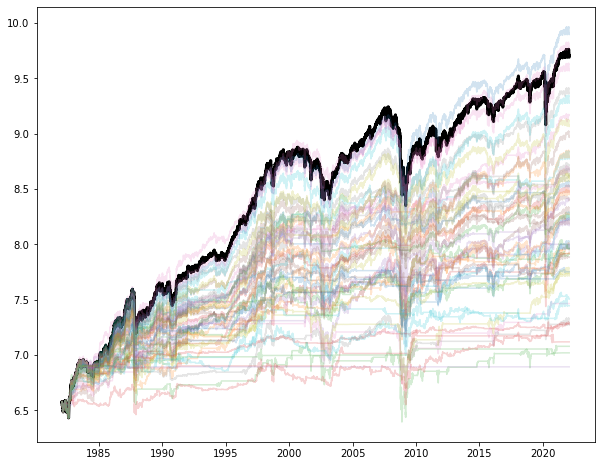

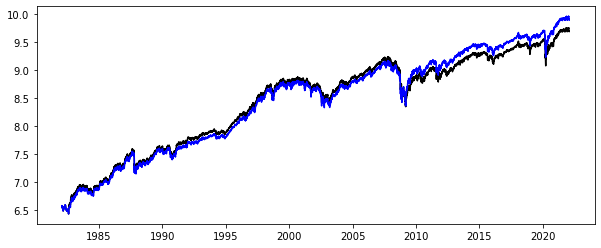

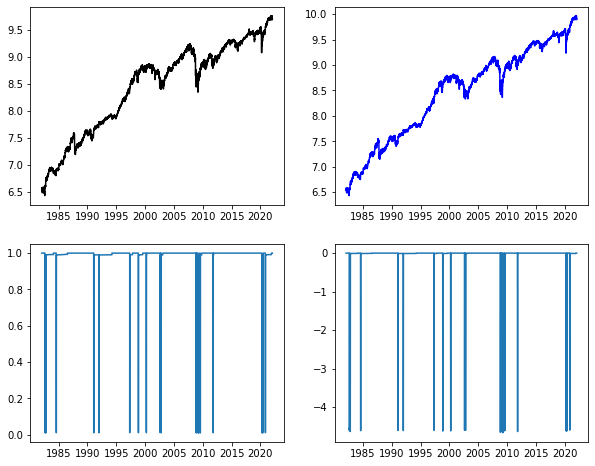



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 1982-01-30
Successfully loaded params from ../data/pct_params/nyse_40yr_2param.json
{   'params': {   'amounts': [-0.7205952356968999, 0.968652049675131],
                  'qs': [0.99, -0.5954685821321397]},
    'sd': 0.1660619673712707,
    'window': 20}
 1: Final value: $16564.60 (window = 20; sd = 0.166)
19: Final value: $16786.86 (window = 45; sd = 0.139))
New best model!
{   'amounts': [0.99, -0.0244692121530371],
    'qs': [-0.4352854713455635, -0.8272014712702384]}
25: Final value: $17545.90 (window = 206; sd = 0.198)
New best model!
{   'amounts': [0.99, -0.9886618317390004],
    'qs': [-0.07665529195537588, -0.9787977757897187]}
50: Final value: $16397.86 (window = 998; sd = 0.233)
% in now: 1.0
Actions taken: 61
Wrote params to ../data/pct_params/nyse_40yr_2param.json


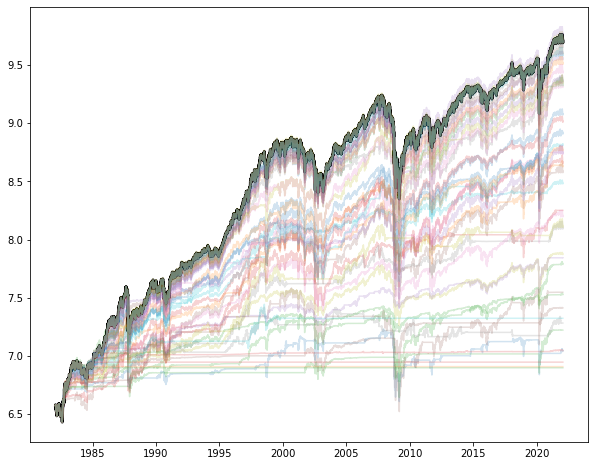

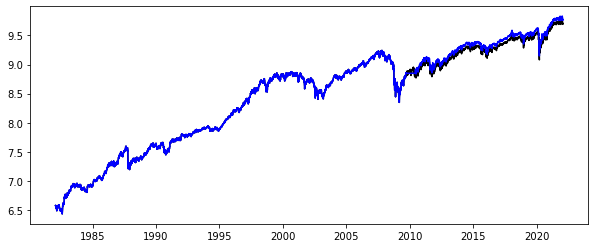

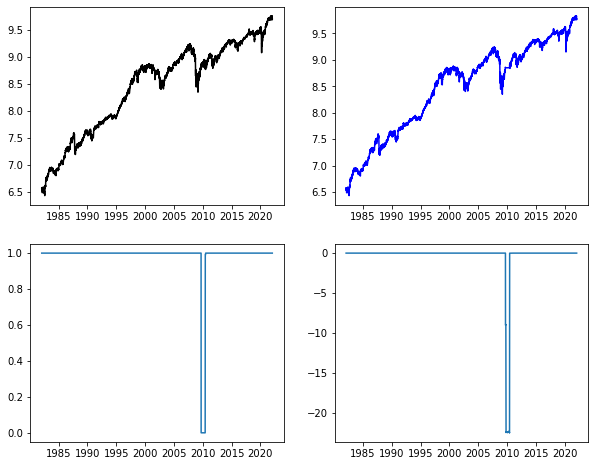



--------------------------------------------------
Beginning 1-param model...
--------------------------------------------------
Using start date: 1982-01-30
Successfully loaded params from ../data/pct_params/nyse_40yr_1param.json
{   'params': {'amounts': [0], 'qs': [0.4180193214438457]},
    'sd': 0.21783112010651517,
    'window': 20}
 1: Final value: $16397.86 (window = 20; sd = 0.218)
50: Final value: $ 1430.00 (window = 828; sd = 0.133)
% in now: 1.0
Actions taken: 0
Wrote params to ../data/pct_params/nyse_40yr_1param.json


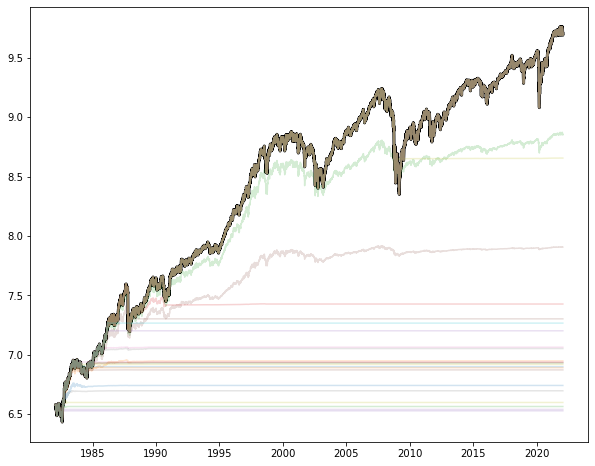

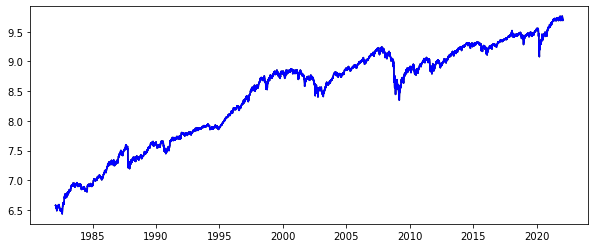

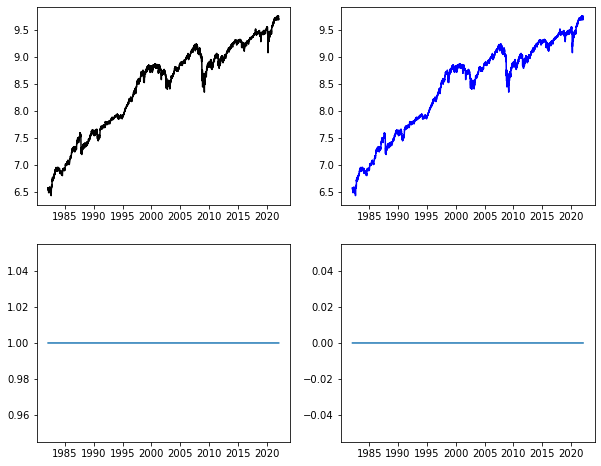




NASDAQ


--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 1982-01-30
Successfully loaded params from ../data/pct_params/nasdaq_40yr_3param.json
{   'params': {   'amounts': [0.8870374478929434, 0.99, -0.886716737524649],
                  'qs': [   -0.12702629195751486,
                            0.27827689832310626,
                            -0.28414146169379356]},
    'sd': 0.13178914927580712,
    'window': 40}
 1: Final value: $34913.61 (window = 40; sd = 0.132)
50: Final value: $ 3993.76 (window = 211; sd = 0.081)
% in now: 0.998628412424835
Actions taken: 773
Wrote params to ../data/pct_params/nasdaq_40yr_3param.json


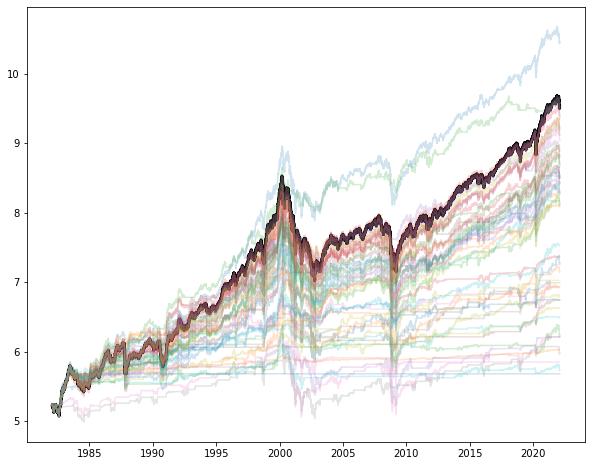

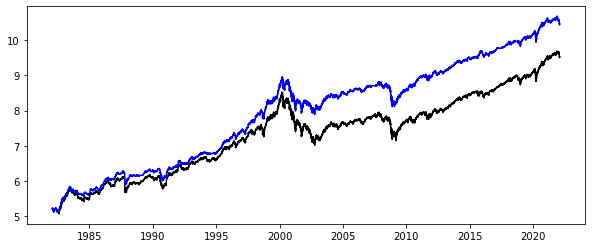

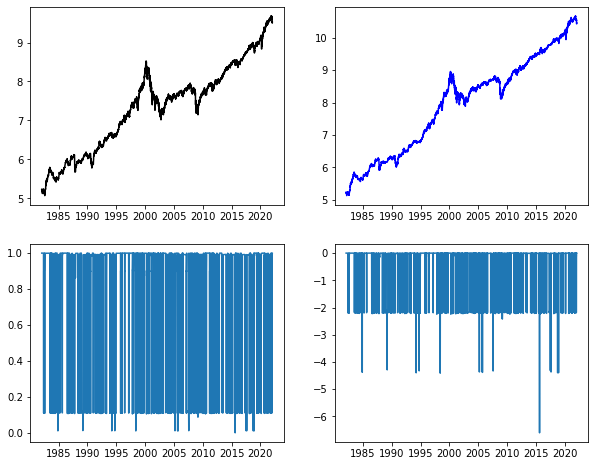



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 1982-01-30
Successfully loaded params from ../data/pct_params/nasdaq_40yr_2param.json
{   'params': {   'amounts': [0.99, -0.9847882982830337],
                  'qs': [0.5924374923784882, -0.07574750584502826]},
    'sd': 0.13178914927580712,
    'window': 45}
 1: Final value: $24991.06 (window = 45; sd = 0.132)
50: Final value: $ 2232.18 (window = 113; sd = 0.081)
% in now: 0.01437718817438363
Actions taken: 453
Wrote params to ../data/pct_params/nasdaq_40yr_2param.json


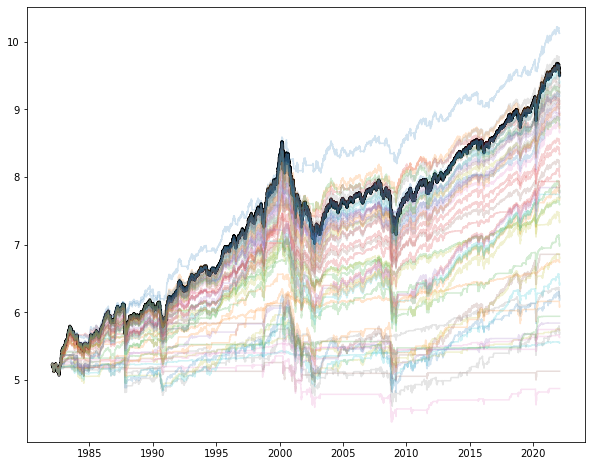

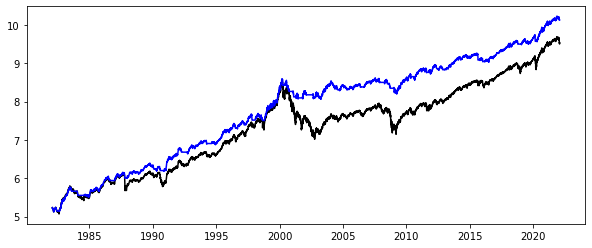

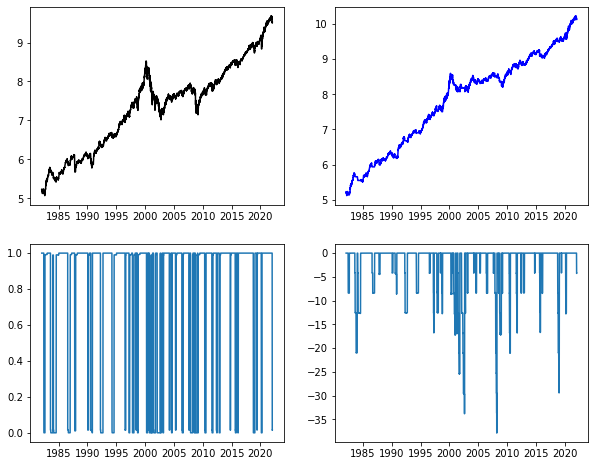



--------------------------------------------------
Beginning 1-param model...
--------------------------------------------------
Using start date: 1982-01-30
Successfully loaded params from ../data/pct_params/nasdaq_40yr_1param.json
{   'params': {'amounts': [0], 'qs': [-0.0859480775539192]},
    'sd': 0.21783112010651517,
    'window': 20}
 1: Final value: $13770.57 (window = 20; sd = 0.218)
50: Final value: $  541.91 (window = 20; sd = 0.133))
% in now: 1.0
Actions taken: 0
Wrote params to ../data/pct_params/nasdaq_40yr_1param.json


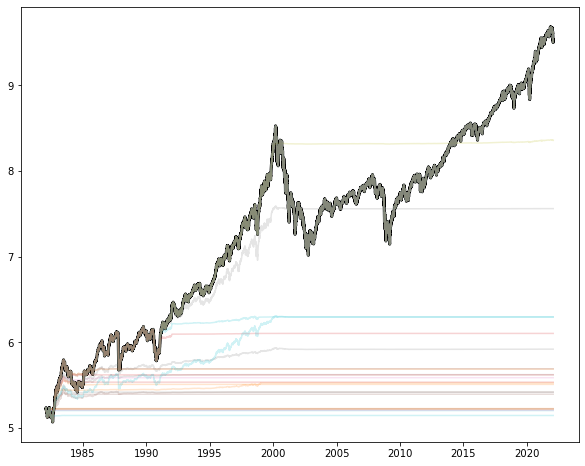

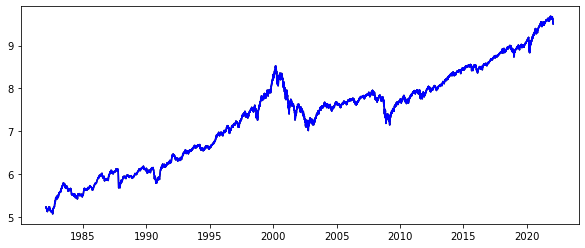

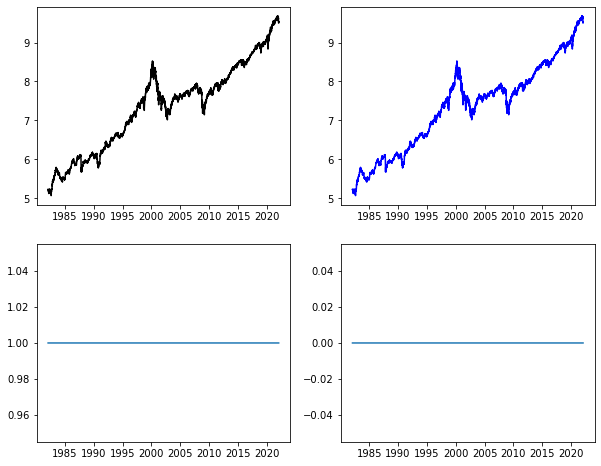

Percents in:
nyse: [1.0, 1.0, 1.0]
nasdaq: [0.9986, 0.0144, 1.0]


In [4]:
percent_in = {}

for symbol in symbols:
    ticker = tickers[symbol]
    path = paths[symbol]
    percent_in[ticker] = []
    print(f'\n\n\n{"=" * 60}')
    print(ticker.upper())
    print('=' * 60)
    for n_params in [3, 2, 1]:
        print(f'\n\n{"-" * 50}')
        print(f'Beginning {n_params}-param model...')
        print('-' * 50)
        filename = f'{ticker}_{years_of_data}yr_{n_params}param.json'
        optim = PercentInOptimizer(n_params, years_of_data, symbol)
        optim.load_params(f'{OUTPATH}/{filename}')
        optim.get_data(df=path)
        specified = None
        best_data = optim.run_sim(ITERS)
        percent_in[ticker].append(plot_results(best_data))
        optim.save_params(f'{OUTPATH}/{filename}')
        plt.show()
print('Percents in:')
for k, v in percent_in.items():
    v = [round(val, 4) for val in v]
    print(f'{k}: {v}')